# **Music Recommendation System**

---------------
## **Context**
---------------

With the advent of technology, societies have become more efficient with their lives. At the same time, however, individual human lives have also become more face-paced and distracted, leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. It has in face made it easier for humans with a shortage of time to find and consume good content.

Almost every internet-based company's revenue relies on the time consumers spend on its platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent and make their experience better. Therefore, one of the key challenges for these companies is figuring out what kind of content their customers are most likely to consume. 

Spotify is one such audio content provider with a huge market base across the world. With the ever-increasing volume of songs becoming available on the Internet, searching for songs of interest has become a tedious task in itself. However, Spotify has grown significantly in the market because of its ability to recommend the 'best' next song to each and every customer based on a huge preference database gathered over time - millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on users' likes/dislikes.

-----------------
## **Objectives**
-----------------

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

--------------------
## **Key Questions**
--------------------
The key questions need to be answered are as below:
- What recommendation systems, models and algorithms to use.
- How to choose hyperparameters, if any.
- How to evaluate the performance of each models.



--------------------------
## **Problem formulation**
--------------------------
- Due to the ever-increasing volume of songs and the lack of time for searching songs, Spotify needs a recommendation system to make the best recommendation for the users.
- There are very useful recommendation systems and models can be applied, and these models will be applied on the dataset we have.
- Based on the evaluation criteria, the best model will be chosen.
- Top 10 songs selected by the model will be recommended to a user.


-----------------------
## **Data Exploration**
-----------------------
**Data Description** 

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

**count_data**

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
count_df

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...,...
1999995,1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [ ]:
 # Display the dimension of the count_df data
 count_df.shape

(2000000, 4)

In [ ]:
# Display the dimension of the song_df data
song_df.shape

(1000000, 5)

### **Let us check the data types and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
# Check missing values in the 'count_df' dataset
count_df.isnull().sum().sort_values(ascending = False)

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
# Check missing values in the 'song_df' dataset
song_df.isnull().sum().sort_values(ascending= False)

title          15
release         5
song_id         0
artist_name     0
year            0
dtype: int64

#### **Observations and Insights:**
- There are 2 million observations and 4 columns for the 'count_df' dataset and 1 million observations and 5 columns for the 'song_df' dataset.
- For the 'count_df', 'Unnamed: 0' and 'play_count' are int64 data type, whereas 'user_id' and 'song_id' are object type.
- For the 'song_df', all the columns are object type except for 'year', which is numeric data type(int64).
- There are no missing values in the 'count_df' dataset.
- There are 15 missing titles in the 'song_df' dataset. However, title of a song can't be replaced with any other title, the dataset will remain as is.

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = count_df.merge(song_df, left_on = "song_id", right_on = "song_id", how = "left")

# Drop the column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005


The columns **business_id** and **user_id** are encrypted to provide anonymity. To ease our processing of the dataset we will use **label encodings** to process these two variables.

In [ ]:
# To do Label Encoding
from sklearn.preprocessing import LabelEncoder 

# Label Encoding
le = LabelEncoder()

# Fit transform the user_id column
df['user_id'] = le.fit_transform(df['user_id'])

# Fit transform the song_id column
df['song_id'] = le.fit_transform(df['song_id'])

In [ ]:
# See the first 5 observations
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,736,1,Stronger,Graduation,Kanye West,2007
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005


Here, users to have listened at least 90 songs and the songs to be listened by at least 120 users will only be considered.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our song to be listened by at least 120 users to be considered
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final['play_count'] <= 5]
df_final.play_count.sort_values(ascending = False)

575056     5
1446184    5
521888     5
434353     5
228884     5
          ..
879006     1
879005     1
879004     1
879003     1
2086699    1
Name: play_count, Length: 154377, dtype: int64

In [ ]:
# Check the shape of the final dataset
df_final.shape

(154377, 7)

In [ ]:
# See the info of the final dataset
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154377 entries, 209 to 2086699
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      154377 non-null  int64 
 1   song_id      154377 non-null  int64 
 2   play_count   154377 non-null  int64 
 3   title        154377 non-null  object
 4   release      154377 non-null  object
 5   artist_name  154377 non-null  object
 6   year         154377 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 9.4+ MB


In [ ]:
# Check missing values in the final dataset
df_final.isnull().sum().sort_values(ascending = False)

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

#### **Observations and Insights:**
- To make one dataset, 'count_df' and 'song_df' datasets have been merged by left inner join. 
- Observations of which users listened at least 90 songs and the songs listened by at least 120 users are only considered.
- In addition, observations with play_count >5 have been filtered out. 
- After the filterings, there are 154,377 observations and 7 columns in the final data.
- There are no missing values in the final dataset.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
print('Number of unique user_id =', df_final['user_id'].nunique())

Number of unique user_id = 3476


Total number of unique song id

In [ ]:
# Display total number of unique song_id
print('Number of unique song_id =', df_final['song_id'].nunique())

Number of unique song_id = 695


Total number of unique artists

In [ ]:
# Display total number of unique artists
print('Number of unique artists =', df_final['artist_name'].nunique())

Number of unique artists = 258


#### **Observations and Insights:**
- There are 3,476 unique users in the final dataset.
- There are 695 unique songs in the final dataset.
- There are 258 unique artists in the final dataset.
- As per the number of unique users and songs, there is a possibility of 3,476 * 695 = 2,415,820 observations in the datset. However, there are only 154,377 observations, i.e., not every user listened every song in the dataset.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# The most interacted song

most_interacted_songs = df_final.groupby('song_id').size().sort_values(ascending = False)[:1]
most_interacted_songs

song_id
8582    1652
dtype: int64

In [ ]:
# The information of the most interacted song
df_final[df_final['song_id'] == most_interacted_songs.index[0]]

,user_id,song_id,play_count,title,release,artist_name,year
1031,56576,8582,3,Use Somebody,Use Somebody,Kings Of Leon,2008
1032,56576,8582,3,Use Somebody,Hitzone 49,Kings Of Leon,2008
1357,49549,8582,4,Use Somebody,Use Somebody,Kings Of Leon,2008
1358,49549,8582,4,Use Somebody,Hitzone 49,Kings Of Leon,2008
4277,46525,8582,2,Use Somebody,Use Somebody,Kings Of Leon,2008
...,...,...,...,...,...,...,...
2080924,30647,8582,3,Use Somebody,Hitzone 49,Kings Of Leon,2008
2082132,9570,8582,2,Use Somebody,Use Somebody,Kings Of Leon,2008
2082133,9570,8582,2,Use Somebody,Hitzone 49,Kings Of Leon,2008
2085087,590,8582,2,Use Somebody,Use Somebody,Kings Of Leon,2008


Most interacted users

In [ ]:
# The most interacted user
most_interacted_user = df_final.groupby('user_id').size().sort_values(ascending = False)[:1]
most_interacted_user

user_id
61472    311
dtype: int64

#### **Observations and Insights:**
- The most interacted song is "Use Somebody", released in 2008, by the artist 'Kings of Leon' and it has been interacted 1,652 times. 
- The most interacted user is 'user_id = 61472', and he/she has interacted 311 times.


Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,9515
2007,17510
2008,18619
2009,19856
2010,5541


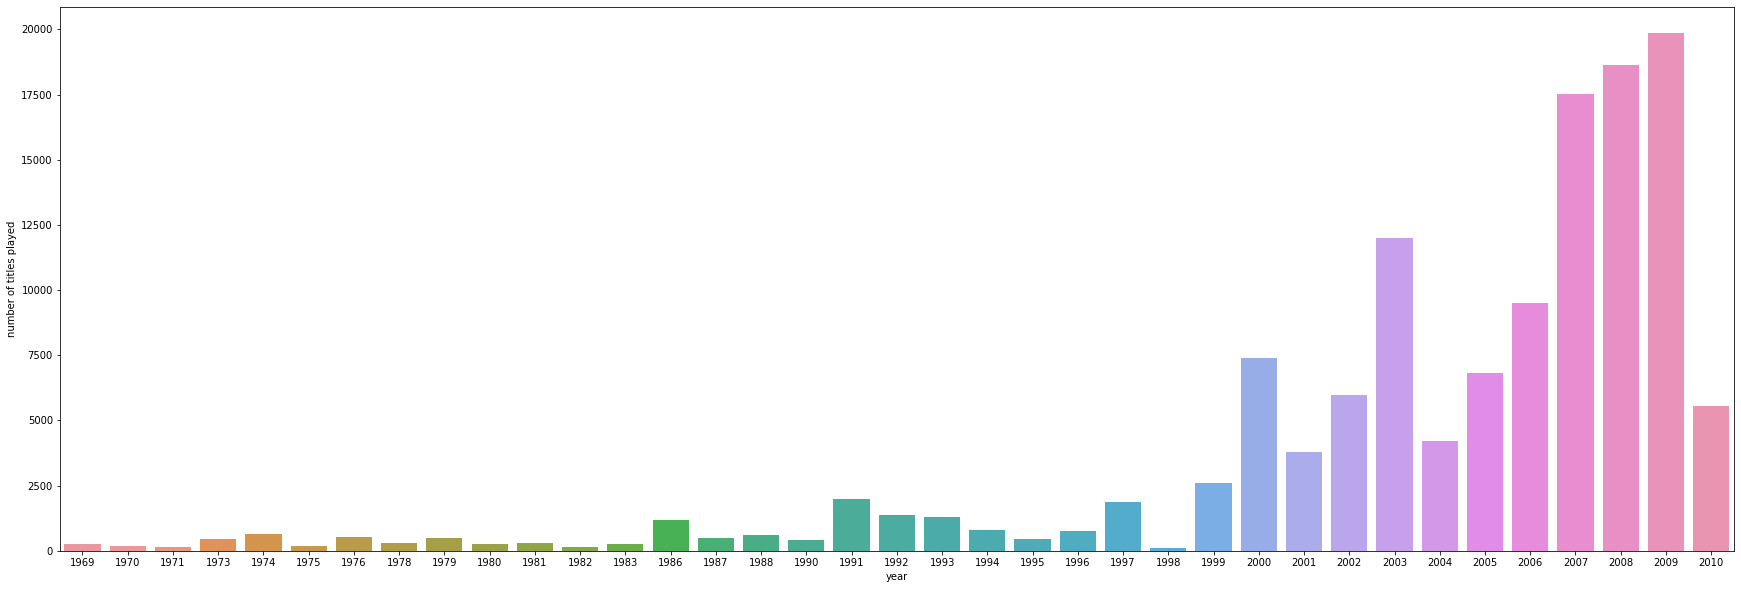

In [ ]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:** # 
- The year 2009 has the most number of songs played, followed by the year 2008 and 2007.
- There is a positive correlation between 'year' and the 'number of titles played', which means the songs relased in more recent years tend to be listened by the users. 
- Since it is expected that younger generations are more likely to use spotify than older generations and they are more likely to listen to songs relased in more recent years.
- However, to find out the validity of this assumption, we further check the total number of songs released in each year, and the user ages, etc.

------------------------
## **Proposed Approach**
------------------------
**Potential techniques**

Below Recommendation Systems and models should be explored.
- Popularity-Based Recommendation Systems
- User User Similarity-Based Collaborative Filtering
- Item Item Similarity-Based Collaborative Filtering
- Model Based Collaborative Filtering - Matrix Factorization
- Cluster Based Recommendation System
- Content Based Recommendation Systems

**Overall solution design**
- All of the potential techniques will be applied on the dataset.
- Based on the evaluation criteria, the best model will be chosen.
- Top 10 songs selected by the model will be recommended to a user.

**Measures of success**
- Precision@k: It is the fraction of recommended items that are relevant in top k predictions. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.

- Recall@k: It is the fraction of relevant items that are recommended to the user in top k predictions.

- F1-score@k: It is the harmonic mean of Precision@k and Recall@k. When precision@k and recall@k both seem to be important then it is useful to use this metric because it is representative of both of them.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']        # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count']        # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq

final_play2 = pd.DataFrame(average_count, play_freq, columns = ('avg_count', 'play_freq'))
final_play2

,avg_count,play_freq
play_count,,
280,NaN,NaN
143,NaN,NaN
110,NaN,NaN
460,NaN,NaN
123,NaN,NaN
...,...,...
243,NaN,NaN
161,NaN,NaN
143,NaN,NaN


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})
# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.635714,280
22,1.454545,143
50,1.618182,110
52,1.719565,460
62,1.731707,123


In [ ]:
final_play.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_count,695.0,1.643237,0.21703,1.20339,1.481071,1.624573,1.765761,3.396396
play_freq,695.0,222.125180,157.44479,89.00000,129.000000,163.000000,249.000000,1652.000000


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

def top_n_songs(final_play, n, min_playcounts):
    
    # Finding products with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] >= min_playcounts]
    
    # Sorting values with respect to average rating 
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

### **Recommending top 10 songs with 163 minimum interactions(Median) based on popularity**

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, n = 10, min_playcounts = 163))

[5531, 614, 2220, 6860, 352, 6246, 1664, 1334, 4448, 8019]

### **Recommending top 10 songs with 222 minimum interactions(Mean) based on popularity**

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, n = 10, min_playcounts = 222))

[5531, 614, 2220, 352, 6246, 1664, 1334, 4448, 8019, 7496]

## **Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip.
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 3.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633993 sha256=bdb0c83f8c40baa1688f13ac44535bd92d5d276431c67f7ac428d133031ccd7c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale = (0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[["user_id", "song_id", "play_count"]], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42) # Take test_size = 0.4

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, Verbose = False, random_state = 1) # Use random_state = 1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0611
Precision:  0.405
Recall:  0.711
F_1 score:  0.516


**Relevant item:** An item (song in this case) that is actually **played more than the threshold times (here 1.5)** is relevant, if the **actual play_count is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted play_count is higher than the threshold (here 1.5) is a recommended item**, if the **predicted play_count is below the threshold then that song will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them. 

**Observations and Insights:**
- We have calculated RMSE to check how far the overall predicted play_count are from the actual ratings.
- Intuition of Recall: We are getting a recall of 0.711, which means out of all the relevant songs 71.1% are recommended. 
- Intuition of Precision: We are getting a precision of 0.405, which means out of all the recommended songs 40.5% are relevant.
- Here F_1 score of the baseline model is 0.516. It indicates that approximately the half of recommended songs were relevant and relevant songs were recommended.

In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.83   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8256312668335963, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- The above output shows that **the actual play_count for this user-song pair is 2, and the predicted play_count is 1.83** by this **user-user-similarity-based baseline model**.

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.61   {'actual_k': 33, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6118677152959722, details={'actual_k': 33, 'was_impossible': False})

**Observations and Insights:**
- The **predicted play_count of the song_id 3232 for this user is 1.61** based on this **user-user similarity-based baseline model**.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



0.979635734775437
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9831
Precision:  0.452
Recall:  0.744
F_1 score:  0.562


**Observations and Insights:**
- We can observe that after tuning hyperparameters, **F_1 score of the tuned model is 0.562, which is better than the baseline model**. Along with this, **the RMSE of the model has gone down as compared to the model before hyperparameter tuning**. Hence, we can say that the model performance has improved after hyperparameter tuning.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2

sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.97   {'actual_k': 27, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9674556802913845, details={'actual_k': 27, 'was_impossible': False})

**Observations and Insights:**
- If we compare the predicted rating with the actual rating, for the userId = 6958, we can say that the predicted play_count by the optimized model is closer to the actual play_count in comparison to the prediction by the baseline model. 

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)

sim_user_user_optimized.predict(6958, 3232, verbose = True) 

user: 6958       item: 3232       r_ui = None   est = 1.86   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.8558648047903226, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**
- The **predicted play_count of the song_id 3232 for this user is 1.86** based on this **user-user similarity-based baseline model**.

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[907, 576, 1667, 2590, 996]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user song playcounts matrix
    user_song_playcounts_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not listened yet
    non_played_songs = user_song_playcounts_matrix.loc[user_id][user_song_playcounts_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not listened yet
    for song_id in non_played_songs:

        # Predicting the play_count for those non played song ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted ratings
        recommendations.append((song_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returning top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for user_id "6958" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_playcounts"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcounts'])


,song_id,predicted_playcounts
0,2852,3.399815
1,352,2.725486
2,7682,2.559364
3,7452,2.512630
4,9076,2.486656


**Observations and Insights:**
- 5 songs are recommended based on the user-user similarity model. The song_ids are listed as per the predicted_playcounts with descending order.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_play):
    # Sort the songs based on play counts
    ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

    # Merge with the recommended songs to get predicted play_count
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcounts']), on = 'song_id', how = 'inner')

    # Rank the songs based on corrected play_counts
    ranked_songs['corrected_ratings'] = ranked_songs['predicted_playcounts'] - 1/np.sqrt(ranked_songs['play_freq'])

    # Sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

    return ranked_songs

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_playcounts,corrected_ratings
2,2852,254,3.399815,3.337069
0,352,821,2.725486,2.690586
4,7682,144,2.559364,2.476030
1,7452,351,2.512630,2.459254
3,9076,156,2.486656,2.406592


**Observations and Insights:**
- After correction, same five songs are recommended with different order, based on the corrected_ratings.

### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0077
Precision:  0.313
Recall:  0.561
F_1 score:  0.402


**Observations and Insights:**
- The baseline model is giving a good F_1 score of ~ 40%. We will try to **improve this later by using GridSearchCV** by tuning different hyperparameters of this algorithm.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user

sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.42   {'actual_k': 21, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4238426703016684, details={'actual_k': 21, 'was_impossible': False})

**Observations and Insights:**
- The above output shows that **the actual rating for this user-item pair is 2 and the predicted rating is 1.42** by this **item-item-similarity-based baseline model**.

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 3232)

sim_item_item.predict(6958, 3232 , verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'actual_k': 21, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4755602240054544, details={'actual_k': 21, 'was_impossible': False})

**Observations and Insights:**
- The **predicted play_count of the song_id 3232 for this user is 1.48** based on this **item-item similarity-based baseline model**.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid = param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9621117323494285
{'k': 20, 'min_k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [ ]:
# Apply the best modle found in the grid search

# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline', 'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options , k = 20, min_k = 3 , random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)


RMSE: 0.9697
Precision:  0.468
Recall:  0.614
F_1 score:  0.531


**Observations and Insights:**
- We observe that after tuning hyperparameters, both F_1 score and RMSE of the tuned model is better than the baseline model. Hence the tuned model is doing better than the baseline model.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)

sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.07   {'actual_k': 7, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.0728310917959085, details={'actual_k': 7, 'was_impossible': False})

**Observations and Insights:**
- If we compare the predicted rating with the actual rating, for the user_id = 6958, we can say that the predicted play_count by the optimized model is closer to the actual play_count in comparison to the prediction by the baseline model. 

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user

sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.00   {'actual_k': 9, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.0, details={'actual_k': 9, 'was_impossible': False})

**Observations and Insights:**
- The **predicted play_count of the song_id 3232 for this user is 1** based on this **item-item similarity-based optimized model**.

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[40, 59, 145, 52, 93]

In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcounts'])


,song_id,predicted_playcounts
0,3466,3.429231
1,2234,3.372966
2,4806,3.286799
3,9076,3.122453
4,5398,3.015413


In [ ]:
# Applying the ranking_songs function

ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_playcounts,corrected_ratings
4,3466,118,3.429231,3.337173
3,2234,154,3.372966,3.292383
1,4806,235,3.286799,3.221566
2,9076,156,3.122453,3.042389
0,5398,300,3.015413,2.957678


**Observations and Insights:**
- 5 songs are recommended based on the user-user similarity model. The song_ids are listed as per the predicted_playcounts with descending order.
- After correction, same 5 songs are recommended.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.9761
Precision:  0.43
Recall:  0.659
F_1 score:  0.52


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2

svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.63   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6322878531524347, details={'was_impossible': False})

**Observations and Insights:**
- As we can observe, **the actual play_count** for this user-song pair is 2, and the predicted rating is **1.63** by this matrix **factorization-based baseline model**.

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)

svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.93   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.9312056088502767, details={'was_impossible': False})

**Observations and Insights:**
- The **predicted play_count of the song_id 3232 for this user is 1.93** based on this matrix **factorization-based baseline model**.

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid = param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9903257994883264
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=30, lr_all = 0.01, reg_all = 0.2, random_state =1)

# Train the algorithm on the trainset
svd_algo_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized)


RMSE: 0.9873
Precision:  0.406
Recall:  0.64
F_1 score:  0.497


**Observations and Insights:**
- We observe that after tuning hyperparameters, the model performance has not improved at all. It actually performs worse.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671

svd_algo_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.57   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5683612006993852, details={'was_impossible': False})

**Observations and Insights:**
- If we compare the predicted rating with the actual rating, for the userId = 6958, we find that the predicted play_count by the optimized model is not closer to the actual play_count in comparison to the prediction by the baseline model. The optimized model actually performs worse than the baseline model.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating

svd_algo_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.59   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5930432795998162, details={'was_impossible': False})

**Observations and Insights:**
- The **predicted play_count of the song_id 3232 for this user is 1.59** based on this matrix **factorization-based optimized model**.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_algo_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_playcounts,corrected_ratings
2,7224,111,2.906465,2.811549
3,8324,103,2.518884,2.420351
0,9942,161,2.442956,2.364145
1,6450,115,2.377569,2.284319
4,4831,99,2.241379,2.140875


**Observations and Insights:**
- 5 songs are recommended based on the matrix factorization-based model. The song_ids are listed as per the corrected_playcounts with descending order.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0249
Precision:  0.397
Recall:  0.583
F_1 score:  0.472




* We have calculated **RMSE** to check **how far the overall predicted ratings** are from the **actual ratings**.

* Here **F_1 score** of the **baseline model is 0.472**. It indicates that **recommended songs were relevant and relevant songs were recommended for slightly less than half the recommendations**. We will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.10   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.101139902392129, details={'was_impossible': False})

**Observations and Insights:**
- As we can observe, **the actual play_count** for this user-song pair is 2, and the predicted rating is **1.1** by this **cluster-based baseline model**.

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.241987684939197, details={'was_impossible': False})

**Observations and Insights:**
- The **predicted play_count of the song_id 3232 for this user is 1.24** based on this **cluster-based baseline model**.

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0354051246025822
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


In [ ]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5,n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0448
Precision:  0.389
Recall:  0.556
F_1 score:  0.458


**Observations and Insights:**
- We observe that after tuning hyperparameters, the model performance has not improved at all. It actually performs worse.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.95   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.9480386843687532, details={'was_impossible': False})

**Observations and Insights:**
- If we compare the predicted rating with the actual rating, for the userId = 6958, we find that the predicted play_count by the optimized model is not closer to the actual play_count in comparison to the prediction by the baseline model. The optimized model actually performs worse than the baseline model.

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.15   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1472724008438488, details={'was_impossible': False})

**Observations and Insights:**
- The **predicted play_count of the song_id 3232 for this user is 1.15** based on this **cluster-based optimized model**.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_playcounts,corrected_ratings
3,7224,111,4.134923,4.040008
1,6450,115,3.163386,3.070136
4,4831,99,2.735282,2.634778
0,6246,441,2.665389,2.617770
2,5653,112,2.707504,2.613013


**Observations and Insights:**

- 5 songs are recommended based on the cluster-based recommendation model. The song_ids are listed as per the corrected_playcounts with descending order.

### Content Based Recommendation Systems

Text data generally contains pronunciation, stopwords, non-ASCII characters which makes it **very noisy**. So, we will first need to **pre-process the text** and then we will **generate features from the text to compute similarities** between the texts/reviews. Before that, let's see some terminology:

**stopwords:** A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that does not contain information in the text and can be ignored.

**Lemmatization:** Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item. For example, runs, running, and ran are all forms of the word run, therefore run is the lemma of all these words.

In [ ]:
df_small = df_final
df_small['title']

209                     Daisy And Prudence
211        The Ballad of Michael Valentine
212              I Stand Corrected (Album)
213                  They Might Follow You
214                             Monkey Man
                        ...               
2086668                   Half Of My Heart
2086670              Bitter Sweet Symphony
2086679         The Police And The Private
2086689                       Just Friends
2086699               He Can Only Hold Her
Name: title, Length: 154377, dtype: object

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"

df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = df_small.index

indices[ : 5]

Index(['Daisy And Prudence', 'The Ballad of Michael Valentine',
       'I Stand Corrected (Album)', 'They Might Follow You', 'Monkey Man'],
      dtype='object', name='title')

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

nltk.download('averaged_perceptron_tagger')

nltk.download('all')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to

We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transform the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03198715],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03198715, ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    indices = pd.Series(df_small.index)

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[484, 566, 256, 643, 506, 392, 465, 478, 477, 479]


['Big Me',
 'Everlong',
 'The Pretender',
 'Just Lose It',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Creature Fear',
 'Speak',
 'Black Hole Sun']

**Observations and Insights:**

- Since the text is composed of title, release, and artist name, top 3 recommended songs have the same artist name. Other recommended songs have similar words, such as 'Fly', 'To' , etc.

## **Conclusion and Recommendations:** 

##**Refined Insights** 
**What are the most meaningful insights from the data relevant to the problem?**

For this project, below Recommendation Systems and models have been explored.
- Popularity-Based Recommendation Systems
- User User Similarity-Based Collaborative Filtering
- Item Item Similarity-Based Collaborative Filtering
- Model Based Collaborative Filtering - Matrix Factorization
- Cluster Based Recommendation System
- Content Based Recommendation Systems

The surprise library was used to demonstrate"user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," and "model-based collaborative filtering (SVD)" algorithms. The nltk library was used to demonstrate "content-based recommendation system". For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters.
For performance evaluation of these models, precision@k and recall@k are used. Using these two metrics, the F_1 score is calculated for each working model.

##**Comparison of various techniques and their relative performance** 

**How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?**

With each system, RMSE, Recall, Precision, and F-1 score are calculated, and the estimated play_counts values are predicted with each model. Using GridSearchCV, optimized hyperparameters are found, and predict the play_counts values.

##**Proposal for the final solution design** 

**What model do you propose to be adopted? Why is this the best solution to adopt?**

Based on the measures of success - RMSE, Precision@k, Recall@k, and F1-score@k, and the estimation value, User-User similarity-based optimized model turns out to be the best solution to adopt. It has the lowest RMSE, and the highest precision@k, and the second most accurate value in predicting.

Content Based Recommendation System does not seem perform well, because the text being used is comprised of title, release, and artist name only, thus it's preformance is not quite reliable.

## **Executive Summary**

**What are the key takeaways?**

A paradox exists in today's massive music content environment. Companies like Spotify are aggregating more content than ever to entice viewers to their platforms. However, this deluge of options now makes it too difficult for consumers to identify and select their preferred content. To address this, we have used data science and five machine learning algorithms to build and test the foundations of what is called a "recommendation system". Through this report, we will discuss and demonstrate the approach, key takeaways, results, and next steps.

In this project, we considered the issue of music recommendation. We used two datasets; the core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. The two files in this dataset consist of some features. One contains the details about the song id, titles, release, artist name and the year of release. The second file contains the user id, song id, and users' play count

Of the "rank-based", "user-user collaborative filtering", "item-item collaborative filtering", "model-based matrix factorization", and "cluster-based matrix factorization", none were exceptional at making highly-accurate personalized recommendations; however, one model was acceptable. In considering the trade-offs between the models among key metric performance, the "untuned, user-user collaborative filtering" model delivered the best results

**What are the key next steps?**

Before building and deploying a consumer-ready model, we will experiment with the training data volume and allocation to seek better model performance. We will do this by experimenting with how aggressively to filter the dataset (by play_counts) and by adjusting the parameters for splitting the data into training and test sets. We will build the models that will work better on the dataset("rank-based", "user-user collaborative filtering", "item-item collaborative filtering", "model-based matrix factorization", and "cluster-based matrix factorization"). Should these models not deliver better results, we might experiment with a hybrid content-based model. That approach will require additional feature engineering.

**What problem was being solved?**

As Spotify has around 381 million active users, of those, around 172 million are paying premium users, and around 209 million are non-paying users. Some challenges for Spotify are to figure out what music their users are most likely to listen to, to tailor their songs recommendations according to the users’ preferences, stay relevant within the plethora of music streaming platforms, persuade non-paying users to upgrade
to premium accounts, and get more users. Spotify has over 13 million songs, which makes building a recommendation system for all its users is challenging because of the dataset size. So, we need to Increase user engagement, Grow our paying premium users, Utilize the content to build robust recommendation systems, Maintain and increase content) and the solution can be detailed (Example:We need a hybrid system due to the business nature of Spotify and the problem we are trying to solve


**Final proposed solution design**

We want to create systems that have as few errors as possible. But minimizing errors is only part of the story that will help us build a robust recommendation system. It is important to take into account the accuracy of the songs we are recommending, this is possible through the classification of relevant songs (precision) and what relevant songs are being recommended (recall).
Popularity Based: This model only provides the most popular songs. It does not give the precision or recall.
User User Similarity based: 40% are relevant songs and 70% of those relevant songs were recommended.
Model based Collaborstive Filtering Matrix Factorization: 41% are relevant songs and 64% of those relevant songs were recommended.
Item Item similarity based Collaborative Filtering: 40% are relevant songs and 69% of those relevant songs were recommended.
Cluster Based: 39% are relevant songs and 55% of those relevant songs were recommended.
Content Based: This model does not provide precision or recall. Only provides the recommended songs.
User User Similarity-Based system gave us a higher precision and recall between both collaborative recommended systems. The Model Based Collaborative system provided us with a higher precision and recall because it gives us a greater number of relevant songs and only 36% of the relevant songs were not recommended. User User and Model-Based Recommendation Systems complement each other

**Why is this a 'valid' solution that is likely to solve the problem?**

Combining these systems will help us with the lack of data from new users (cold start problem). Provide accurate recommendations tailored to the users’ taste. This fulfills some psychological wants and needs - a marketing central point. We don’t need to collect personal information about the users such as age, and gender. Together these systems are aligned with our business model

**What are some key recommendations to implement the solution?**

Before we implement the solution to the users, we need to check and make sure that this model works the best for the majority of the users. In addition, we also need to check whether the selected users are actually satisfied with the songs recommended for them.

**What are the key actionables for stakeholders?**

Stakeholders should focus on establishing a feedback loop from the users. Moreover, they should start gathering more features (e.g. ratings, reviews) for a better performance / model.

**What is the expected benefit and/or costs?**

By implementing the model, we are able to provide the users better service. Thus, we can expect users spend more time on the platform and the increased profit accordingly.

**What are the key risks and challenges?**

The chosen model considers 'play_count' only, and it might not work perfectly for all of users. We should consider other features, and the best model could be changed according to the new features.

**What further analysis needs to be done?**

As previously mentioned, we should check whether the selected users are satisfied with the recommended songs, as well as the model can be used to majority of the users. In addition, since we only consider 'play_count' variable only and we do not have a clue whether this model performs the best among all possible models, we should check whether other features can improve the performance.